# Import basic libraries & Load the data 

In [ ]:
# Import of basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
# Load the data
df=pd.read_csv("/content/drive/MyDrive/Deep_learning_Projects/BankNote_Authentication.csv")

# Data Preprocessing

In [ ]:
# To get first five data
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
# To get properties of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


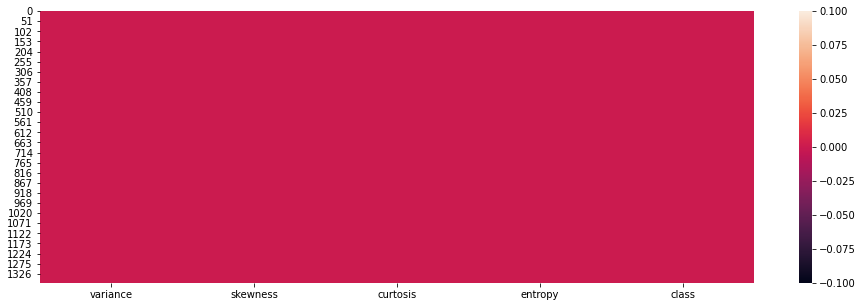

In [ ]:
# visulization of null Values by using heatmap
plt.figure(figsize=(16,5))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
# Null values in %
df.isnull().sum()/df.shape[0]*100

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

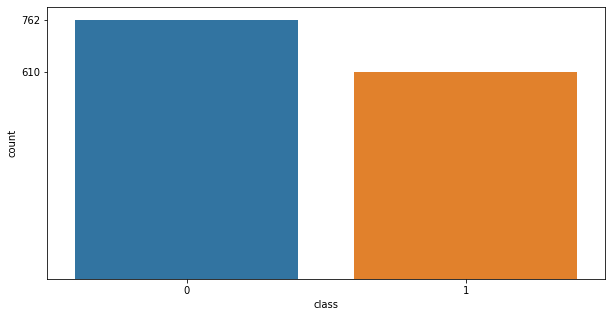

In [ ]:
# To check balance of output feature 
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="class")
plt.yticks(df["class"].value_counts())
plt.show()

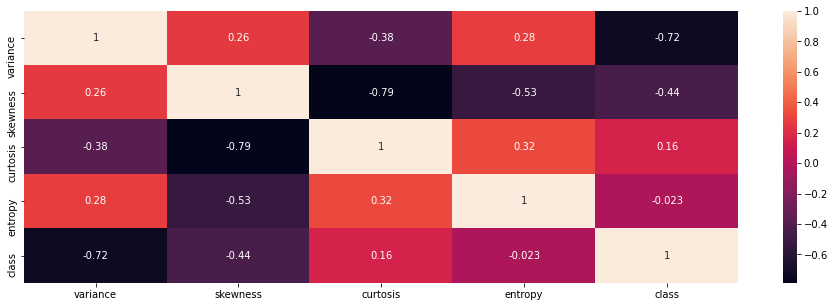

In [ ]:
# To Correlationship of input & output Features
plt.figure(figsize=(16,5))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

#Seperate input & output from dataset

In [ ]:
x=df.drop("class",axis=1)
y=df["class"]

In [ ]:
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64



# Train_test_split data (80%-Training & 20% Testing)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Scalling Input Features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
x_train

array([[-0.60234962,  0.13706318, -0.52441296, -0.41116219],
       [-0.291035  ,  0.21026408, -1.02368742, -0.72585061],
       [-0.68266235, -1.4422953 ,  1.02948859,  0.98074362],
       ...,
       [ 0.06363093, -0.15181461, -0.8474923 ,  0.60907164],
       [ 0.5613238 , -0.36784698,  0.89144827,  1.07801487],
       [-0.87706484,  1.54323822,  0.29632752, -1.75475574]])

In [ ]:
x_test

array([[-0.77000464, -2.18217308,  2.08030018,  0.08130195],
       [ 1.65638872, -0.32963963, -0.24955469,  1.09660204],
       [-0.85562469,  0.31202402, -0.78293531, -1.301957  ],
       ...,
       [-0.90845183,  0.19704581, -0.89473831, -0.59885426],
       [ 0.02407911,  0.29131655, -1.3598972 , -1.26353714],
       [-1.68223069,  0.72303272, -0.19163475, -2.05646189]])

# Check balance of output feature

In [ ]:
pd.Series(y_train).value_counts()

0    605
1    492
Name: class, dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

0    157
1    118
Name: class, dtype: int64

# Balance output feature

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros=RandomOverSampler()

In [ ]:
x_train_sample,y_train_sample=ros.fit_resample(x_train,y_train)
x_test_sample,y_test_sample=ros.fit_resample(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Create Neural Network

In [ ]:
import keras



In [ ]:
model=tf.keras.Sequential([
            tf.keras.layers.Dense(12,activation='relu',input_shape=(x.shape[1],)),# input_shape function bring input data to hidden layer   12 are neurons                                                                                            
            tf.keras.layers.Dense(24,activation='relu'),
            tf.keras.layers.Dense(36,activation='relu'),
            tf.keras.layers.Dense(1,activation='sigmoid') # activation function is mathematical equations that determine output of neural network.
])

# Compile the model

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


# Train the model

In [ ]:
train_model=model.fit(x_train_sample,y_train_sample,epochs=100,validation_split=0.2)
#An epoch means training the neural network with all the training data for one cycle.

Epoch 1/100
31/31 [==============================] - 1s 6ms/step - loss: 0.6362 - accuracy: 0.7603 - val_loss: 0.6170 - val_accuracy: 0.6983
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.8657 - val_loss: 0.4849 - val_accuracy: 0.8388
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.9246 - val_loss: 0.2668 - val_accuracy: 0.9628
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9545 - val_loss: 0.1467 - val_accuracy: 0.9793
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.1255 - accuracy: 0.9607 - val_loss: 0.0773 - val_accuracy: 0.9917
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0839 - accuracy: 0.9731 - val_loss: 0.0524 - val_accuracy: 0.9917
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9742 - val_loss: 0.0372 - val_accuracy: 0.9959
Epoch 8/100
3

# Visualized the history of loss of trained_model

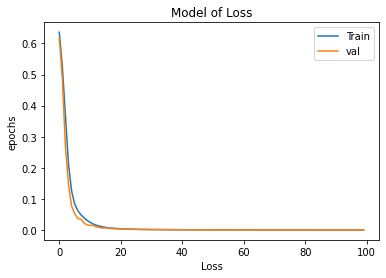

In [ ]:
plt.plot(train_model.history["loss"])
plt.plot(train_model.history["val_loss"])
plt.title("Model of Loss")
plt.xlabel("Loss")
plt.ylabel("epochs")
plt.legend(["Train","val"],loc="upper right")
plt.show()

# Visualized the history of accuracy of trained_model

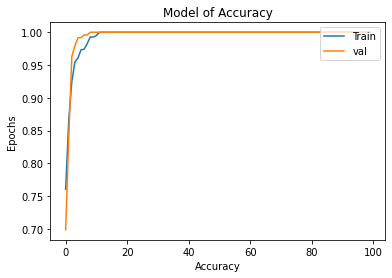

In [ ]:
plt.plot(train_model.history["accuracy"])
plt.plot(train_model.history["val_accuracy"])
plt.title("Model of Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(["Train","val"],loc="upper right")
plt.show()

# Test the model

In [ ]:
y_pred=model.predict(x_test_sample)
print(y_pred[0:5])

[[9.9998450e-01]
 [3.1598495e-07]
 [9.9999899e-01]
 [1.8984028e-06]
 [4.3267690e-07]]


In [ ]:
y_pred=np.where(y_pred>0.5,1,0) # data into probabilty form
print(y_pred[0:5])

[[1]
 [0]
 [1]
 [0]
 [0]]


In [ ]:
print(y_test_sample[0:5])

[1 0 1 0 0]


# Generate Report

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test_sample,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       157

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314



In [ ]:
print(confusion_matrix(y_test_sample,y_pred))

[[157   0]
 [  0 157]]
